In [0]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

import numpy as np
import torch
 
import helper
import matplotlib.pyplot as plt


In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


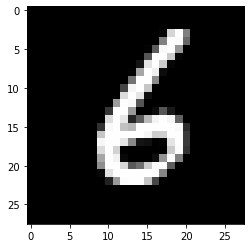

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
images.shape

torch.Size([64, 1, 28, 28])

In [0]:
images

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

In [0]:
images = images.resize_((64,784))

In [0]:
images

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [0]:
torch.manual_seed(7)
W1 = torch.randn((784,256))
B1 = torch.randn((1,256))
W2 = torch.randn((256,10))
B2 = torch.randn((1,10))

In [0]:
output1 = activation(torch.mm(images,W1)+B1)
output2 = torch.mm(output1,W2)+B2

In [0]:
output2.shape

torch.Size([64, 10])

In [0]:
def softmax(x):
  pre = torch.exp(x)
  total = torch.sum(pre,dim=1,keepdims = True)
  return pre/total

In [0]:
probability = softmax(output2)

In [0]:
probability.shape

torch.Size([64, 10])

In [0]:
print(probability.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
probability

tensor([[2.5330e-01, 2.7682e-05, 7.4146e-01, 1.8444e-04, 1.1856e-04, 3.8679e-03,
         5.1719e-09, 1.1391e-07, 1.0396e-03, 6.4799e-11],
        [6.0901e-03, 2.3288e-12, 2.5109e-02, 9.6910e-05, 4.8662e-06, 6.4777e-03,
         1.3040e-10, 1.4603e-07, 9.6222e-01, 6.1605e-07],
        [2.3864e-02, 3.4490e-07, 1.0838e-02, 5.5006e-01, 1.8132e-05, 4.1521e-01,
         3.9172e-08, 2.2473e-10, 4.8458e-06, 2.0166e-11],
        [1.7871e-01, 6.2523e-04, 7.4391e-01, 3.0955e-03, 6.9815e-04, 4.3209e-02,
         3.4438e-04, 2.0273e-04, 2.9209e-02, 1.0157e-07],
        [1.1549e-03, 1.1912e-06, 6.7628e-01, 2.2913e-06, 2.8650e-06, 3.1004e-01,
         6.7555e-05, 2.9414e-05, 3.7762e-04, 1.2041e-02],
        [1.9702e-02, 4.3691e-06, 2.0674e-04, 1.4210e-06, 5.6727e-06, 9.7729e-01,
         1.9926e-05, 1.8684e-06, 2.3713e-03, 3.9326e-04],
        [3.1490e-08, 5.7320e-09, 1.2561e-02, 2.7042e-10, 7.4554e-04, 9.8663e-01,
         6.4467e-07, 7.3240e-12, 6.0416e-05, 7.4726e-13],
        [4.1136e-01, 3.4005

### ***Building Neural networks with pytorch***

In [0]:
from torch import nn

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784,256)
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self, x):
        # Hidden layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
         # Output layer with softmax activation
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [0]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
print(model.fc1.weight)

Parameter containing:
tensor([[ 0.0188, -0.0273, -0.0062,  ..., -0.0302,  0.0100, -0.0166],
        [-0.0159, -0.0329,  0.0085,  ...,  0.0305, -0.0118,  0.0226],
        [-0.0284,  0.0014,  0.0034,  ...,  0.0230, -0.0318, -0.0062],
        ...,
        [ 0.0324, -0.0264,  0.0119,  ...,  0.0004, -0.0049,  0.0060],
        [ 0.0119, -0.0143, -0.0204,  ...,  0.0100, -0.0275, -0.0178],
        [-0.0184, -0.0305, -0.0176,  ...,  0.0136, -0.0077, -0.0202]],
       requires_grad=True)


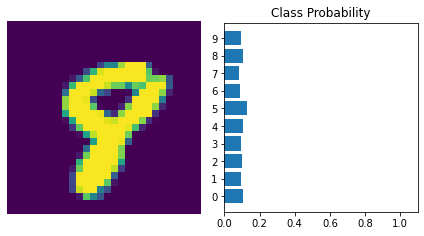

In [0]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [0]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [0]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0044,  0.0110,  0.0169,  ...,  0.0034,  0.0020,  0.0087],
        [-0.0112,  0.0103,  0.0090,  ..., -0.0116,  0.0053, -0.0061],
        [ 0.0065,  0.0041,  0.0114,  ...,  0.0097,  0.0056, -0.0025],
        ...,
        [ 0.0020,  0.0028,  0.0063,  ...,  0.0040,  0.0087,  0.0075],
        [ 0.0023,  0.0083,  0.0026,  ..., -0.0041, -0.0044,  0.0055],
        [ 0.0127, -0.0044,  0.0102,  ..., -0.0141, -0.0057, -0.0121]])

# **Using nn.sequential**

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


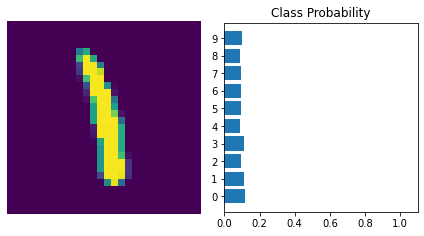

In [0]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

## Naming layers

In [33]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [34]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
